# Resposta em frequência de tempo discreto

Renato Naville Watanabe

## Preparação do ambiente

In [2]:
# @title
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.7 MB/s eta 0:00:00


In [3]:
# @title
import sympy as sym
from sympy.plotting import PlotGrid
import numpy as np
%matplotlib widget

## Definição

Aqui, vamos analisar qual a resposta de um sistema discreto linear e invariante no tempo quando a entrada é uma exponencial complexa.

Vamos considerar uma entrada do tipo:

$$x[n] = e^{j\omega n}$$

Considerando que um sistema tem a resposta ao impulso $h[n]$, a saída desse sistema (estado nulo) para a entrada $x[n]$ é:

$$y[n] = \displaystyle\sum_{k=-\infty}^\infty h[k]e^{j\omega(n-k)} = e^{j\Omega n}\underbrace{ \displaystyle\sum_{k=-\infty}^\infty h[n]e^{-j\omega k}}_{H(e^{j\omega})} = H(e^{j\omega})e^{j\omega n}$$

A função $H(e^{j\omega})$ é conhecida como **Função Resposta em Frequência**.  A expressão anterior mostra que se colocarmos uma exponencial complexa de qualquer frequência $\omega$, a saída será uma exponencial complexa com a mesma frequência $\omega$, multiplicada por $H(e^{j\omega})$. Isso acontece porque a função $e^{j\omega n}$ é uma **autofunção** de qualquer sistema linear e invariante no tempo.

Note que, como a resposta em frequência é calculada a partir da resposta ao impulso, a resposta em frequência também caracteriza completamente o comportamento de um sistema discreto linear e invariante no tempo. Isso significa que se conhecermos a função resposta em frequência de um sistema linear e invariante no tempo, conhecemos completamente o seu comportamento.  Por isso, uma outra maneira de representar um sistema em um diagrama de blocos é com a sua resposta em frequência.

![a](https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/respfreqdisc.png?raw=1)

Até agora, já conhecemos várias formas para caracterizar um sistema linear e invariante no tempo:

- Equação de diferenças
- Diagrama de blocos
- Resposta ao impulso
- Função de resposta em frequência
- Polos e zeros
- Função de transferência

![a](https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/relacoesHdiscHfreq.png?raw=1)

---
### Exemplo 1

Vamos encontrar a resposta em frequência de um sistema que tenha a resposta ao impulso:

$$h[n] = \left(\frac{1}{3}\right)^nu[n]$$

A função resposta em frequência desse sistema é:

$$H(e^{j\omega}) = \displaystyle\sum_{k-\infty}^\infty h[k]e^{-j\omega k} = \displaystyle\sum_{k=-\infty}^\infty \left(\frac{1}{3}\right)^ku[k]e^{-j\omega k} = \displaystyle\sum_{k=0}^\infty \left(\frac{e^{-j\omega} }{3}\right)^k $$

Perceba que o somatório acima é a soma dos elementos de uma progressão geométrica com razão $\frac{e^{-j\omega} }{3}$. Então:

$$H(e^{j\omega}) = \frac{1}{1-\frac{e^{-j\omega} }{3}} = \frac{3}{3 - e^{-j\omega}}$$

---

## Existência da Resposta em frequência

A resposta em frequência só vai existir se a somatória que define a resposta em frequência convergir para um número finito:

$|\displaystyle\sum_{n=-\infty}^\infty h[n]e^{j\omega n}| < \infty$

Para isso acontecer, temos que:

$|\displaystyle\sum_{n=-\infty}^\infty h[n]e^{j\omega n}| \leq \displaystyle\sum_{n=-\infty}^\infty |h[n]e^{j\omega n}| =  \displaystyle\sum_{n=-\infty}^\infty |h[n]||e^{j\omega n}| = \displaystyle\sum_{n=-\infty}^\infty |h[n]| < \infty$

Ou seja, para a resposta em frequência de um sistema existir, temos que $\displaystyle\sum_{n=-\infty}^\infty |h[n]| < \infty$, que é exatamente o critério de estabilidade de um sistema linear e invariante no tempo. Portanto, **um sistema tem uma resposta em frequência apenas se o sistema for estável**.

## Ganho e fase

O valor de $H(e^{j\omega})$ é um número complexo que pode ser escrito na forma polar:

$$H(e^{j\omega}) = |H(e^{j\omega})|e^{j\phi(\omega)}$$

O $|H(e^{j\omega})|$ é o módulo de $H(e^{j\omega})$, e muitas vezes é chamado de **ganho** do sistema. O termo $\phi(\omega)$ é a fase de $H(e^{j\omega})$ e muitas é conhecido como **deslocamento de fase** do sistema.

Então, quando um sinal $x[n] = e^{j\omega n}$ é usado como entrada, a sua saída (estado nulo) será:

$$y[n] = H(e^{j\omega})e^{j\omega n} = |H(e^{j\omega})|e^{j\phi(\omega)}e^{j\omega n} = |H(e^{j\omega})|e^{j(\omega n+\phi(\omega))}$$

Quando o deslocamento de fase é zero, dizemos que a entrada em saída estão **em fase**.

Analisando a expressão da função de resposta em frequência, chegamos em duas propriedades (fica como exercício a prova):

- $|H(e^{j\omega})| = |H(e^{-j\omega})|$

- $\phi(\omega) = - \phi(-\omega)$


___
### Exemplo 2

Considerando o exemplo anterior, vamos calcular o ganho e o deslocamento de fase da resposta em frequência. A resposta em frequência é:

$$H(e^{j\omega}) = \frac{3}{3 - e^{-j\omega}}$$

O ganho é:

$$|H(e^{j\omega})| = \left|\frac{3}{3 - e^{-j\omega}} \right| = \frac{3}{|3-\cos(-\omega) - j\mathrm{sen}(-\omega)|} = \frac{3}{\sqrt{(3-\cos(-\omega))^2 + \mathrm{sen}(-\omega)^2}} = \frac{3}{\sqrt{10 - 6\cos(\omega)}}$$

e o deslocamento de fase é:

$$\phi(\omega) = -\arctan\left(\frac{\mathrm{sen}(\omega)}{3-\cos(\omega)}\right)$$
___

---
### Exemplo 3

Considerando o ganho e deslocamento de fase do exemplo anterior, vamos encontrar o sinal de saída (considerando estado inicial nulo) do sistema se for usado como sinal de entrada $x[n] = e^{j2 n}$.

Nesse caso, $\omega=2$ rad. O ganho e deslocamento de fase para essa frequência angular é:

$$|H(e^{j2})|  = \frac{3}{\sqrt{10 - 6\cos(2)}}=0,85$$

$$\phi(2) =  -\arctan\left(\frac{\mathrm{sen}(2)}{3-\cos(2)}\right) = - 0,26$$


Então, a saída do sistema é:

$$y[n] = |H(e^{j2})|e^{j(2n+\phi(2))} = 0,85e^{j\left(2n-0,26\right)} $$

---

## Resposta em frequência a partir de uma equação diferencial

Considerando o formato geral de uma equação de diferenças de um sistema linear e invariante no tempo:

$$y[n] + a_{1}y[n-1]+...+a_Ny[n-N] = b_Mx[n-M] +...+b_2x[n-2]+b_1x[n-1] + b_0x[n] $$

Se $x[n] = e^{j\omega n}$, a sua saída será $y[n] = H(e^{j\omega})e^{j\omega n}$. Então:

$$H(e^{j\omega})e^{j\omega n} + a_{1}H(e^{j\omega})e^{j\omega (n-1)}+...+a_NH(e^{j\omega})e^{j\omega (n-N)} = b_Me^{j\omega (n-M)} +...+b_2e^{j\omega (n-2)}+b_1e^{j\omega (n-1)} + b_0e^{j\omega n} $$

Colocando $e^{j\omega n}$ em evidência:

$$H(e^{j\omega})e^{j\omega n} + a_{1}H(e^{j\omega})e^{j\omega n}e^{-j\omega)}+...+a_NH(e^{j\omega})e^{j\omega n}e^{-j\omega N} = b_Me^{j\omega n}e^{j\omega M} +...+b_2e^{j\omega n}e^{-j\omega 2}+b_1e^{j\omega n}e^{-j\omega} + b_0e^{j\omega n} $$


Como $e{j\omega n}$ nunca é igual a zero, podemos fazer:

$$H(e^{j\omega}) + a_{1}H(e^{j\omega})e^{-j\omega}+...+a_NH(e^{j\omega})e^{-j\omega N} = b_Me^{j\omega M} +...+b_2e^{-j\omega 2}+b_1e^{-j\omega} + b_0 $$

Então, a função resposta em frequência é:


$$H(e^{j\omega}) = \frac{b_Me^{-j\omega M} +...+b_2e^{-j\omega 2}+b_1e^{-j\omega} + b_0}{a_Ne^{-j\omega N} + a_{N-1}e^{-j\omega(N-1)}+...+1}$$

___
### Exemplo 4

Considerando um sistema com a seguinte equação de diferenças:

$$y[n] + 3y[n-1] - 2y[n-2] = x[n] - 2x[n-1]$$

Então a resposta em frequência desse sistema é:

$$H(e^{j\omega}) = \frac{1 -2e^{-j\omega}}{1+3e^{-j\omega} - 2e^{-2j\omega}}$$

___

## Resposta em frequência a partir da função de transferência

Para sistemas causais e estáveis, a resposta em frequência pode ser obtida da função de transferência:

$H(e^{j\omega}) = \left.H(z)\right|_{z=e^{j\omega}}$

Para sistemas não causais, a função de transferência não é definida (estamos usando a transformada Z unilateral), mas a resposta em frequência é.

---
### Exemplo 5

Um sistema linear e invariante no tempo tem a seguinte resposta ao impulso:

$h[n] = \left(\frac{1}{2}\right)^nu[n]$

A Função de transferência desse sistema é:

$H(z) = \frac{z}{z+0.5}$

Então, a resposta em frequência desse sistema é:

$H(e^{j\omega}) = \frac{e^{j\omega}}{e^{j\omega}+0.5}=\frac{1}{1+0.5e^{-j\omega}}$

---

## Sistemas em cascata

Se dois sistemas forem colocados em cascata, a resposta em frequência do sistema conjunto será a multiplicação das respostas em frequência dos dois sistemas.

![a](https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/respfreqdisccascata.png?raw=1)


$$H(j\omega) = H_1(j\omega)H_2(j\omega)$$

## Resposta de entradas senoidais

Vamos considerar um sistema linear e invariante no tempo com uma resposta em frequência $H(e^{j\omega})$ e uma entrada $x[n] = \cos(\omega n+\theta)$.  Primeiro, vamos reescrever o sinal de entrada como uma soma de duas exponenciais complexas.

$x[n] = \cos(\omega n+\theta) = \frac{e^{j(\omega n + \theta)} + e^{-j(\omega n + \theta)}}{2} = \frac{e^{j\omega n}e^{j\theta} + e^{-j\omega n}e^{-j\theta}}{2} $


Então, a saída do sistema para essa entrada é:

$y[n] = \frac{|H(e^{j\omega})|e^{j(\omega n+\phi(\omega))}e^{j\theta} + |H(e^{-j\omega})|e^{-j\omega n+j\phi(-\omega)}e^{-j\theta}}{2} = \frac{|H(e^{j\omega})|e^{j(\omega n+\theta+\phi(\omega))} + |H(e^{j\omega})|e^{-j(\omega n+\theta+\phi(\omega))}}{2} = |H(e^{j\omega})| \frac{e^{j(\omega n+\theta+\phi(\omega))} + e^{-j(\omega n+\theta+\phi(\omega))}}{2} =  |H(e^{j\omega})|\cos(\omega n+\theta+\phi(\omega))$

![a](https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/respfreqdisccos.png?raw=1)

---
### Exemplo 6

Considerando o mesmo sistema do Exemplo 1. Vamos agora considerar a entrada $x[n] = \cos(4n)$.  Nesse caso, a frequência angular é $\omega=4$ rad. O ganho e o deslocamento de fase do sistema para essa frequência é:

$$|H(e^{j4})|  = \frac{3}{\sqrt{10 - 6\cos(4)}} = 0,80$$

$$\phi(4) =  -\arctan\left(\frac{\mathrm{sen}(4)}{3-\cos(4)}\right)=0,2$$

Então, a saída será:

$$y[n] = |H(e^{j4})|\cos(4n+\phi(4)) = 0,8\cos(4n+0,2) = 0.8\cos(4n+11,46º)$$

---

## Gráfico da resposta em frequência

Normalmente fazemos dois gráficos para representar a resposta em frequência: um do **ganho (módulo)** e outro da **fase**.

---

### Exemplo 7

Vamos considerar o sistema do exemplo 1

$H(e^{j\omega}) = \frac{1}{1-\frac{e^{-j\omega} }{3}} = \frac{3}{3 - e^{-j\omega}}$


O módulo é:

$|H(e^{j\omega})| = \frac{3}{\sqrt{(3-\cos(\omega))^2+\mathrm{sen}^2(\omega)}} = \frac{3}{\sqrt{9-6\cos(\omega)+\cos^2(\omega)+\mathrm{sen}^2(\omega)}}=\frac{3}{\sqrt{10-6\cos(\omega)}}$

e a fase:

$\angle{H(e^{j\omega})} = -\arctan\left(\frac{\mathrm{sen}(\omega)}{3-\cos(\omega)}\right)$

O gráfico do módulo e da fase são mostrados abaixo:


---

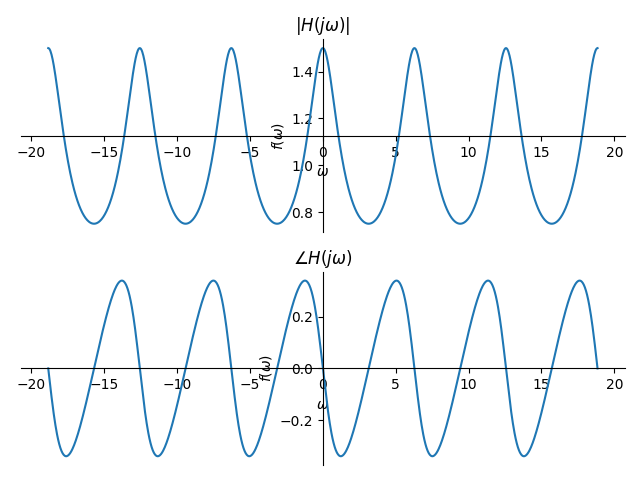

In [4]:
# @title
omega = sym.symbols('\omega')
Hganho = 3/sym.sqrt(10-6*sym.cos(omega))
Hfase = -sym.atan(sym.sin(omega)/(3-sym.cos(omega)))
p1 = sym.plot(Hganho, (omega, -6*np.pi, 6*np.pi),show=False, title='$|H(j\omega)|$')
p2 = sym.plot(Hfase, (omega, -6*np.pi,6*np.pi),show=False, title=r'$\angle H(j\omega)$')
PlotGrid(2,1,p1,p2);

Perceba que a informação contida para frequências negativas é a mesma que está no gráfico para frequências positivas. Então é muito comum mostrar apenas o lado com frequências positivas.

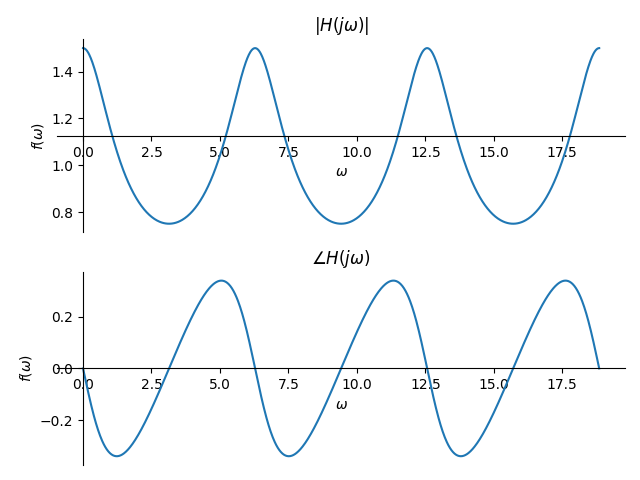

In [5]:
# @title
omega = sym.symbols('\omega')
Hganho = 3/sym.sqrt(10-6*sym.cos(omega))
Hfase = -sym.atan(sym.sin(omega)/(3-sym.cos(omega)))
p1 = sym.plot(Hganho, (omega, 0, 6*np.pi),show=False, title='$|H(j\omega)|$')
p2 = sym.plot(Hfase, (omega, 0,6*np.pi),show=False, title=r'$\angle H(j\omega)$')
PlotGrid(2,1,p1,p2);

Outra coisa muito comum é mostrar o ganho na unidade **dB (decibel)**. Isso é feito fazendo o logaritmo da magnitude e multiplicando por 20.

Em db, a magnitude da resposta em frequência fica:

$|H(j\omega)| = 20\log\left(\frac{1}{|j\omega+2|}\right)= 20\log(1)-20\log(|j\omega+2|)=-20\log(|j\omega+2|) = -20\log(\sqrt{\omega^2+4}) = -10\log(\omega^2+4)$

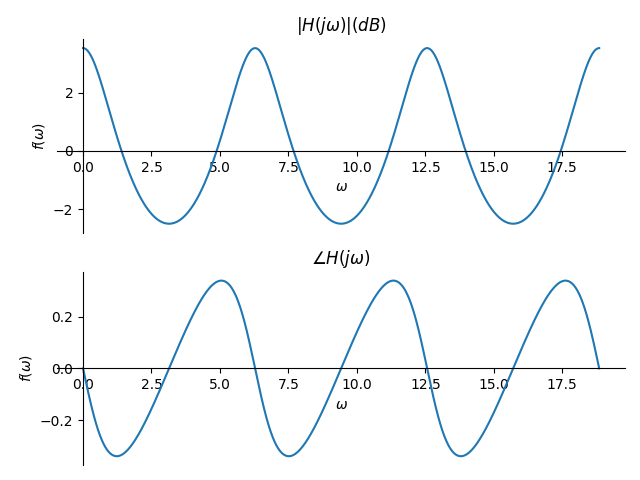

In [ ]:
# @title
omega = sym.symbols('\omega')
Hganho = 3/sym.sqrt(10-6*sym.cos(omega))
Hfase = -sym.atan(sym.sin(omega)/(3-sym.cos(omega)))
p1 = sym.plot(20*sym.log(Hganho,10), (omega, 0, 6*np.pi),show=False, title='$|H(j\omega)| (dB)$')
p2 = sym.plot(Hfase, (omega, 0,6*np.pi),show=False, title=r'$\angle H(j\omega)$')
PlotGrid(2,1,p1,p2);

Perceba que a resposta em frequência se repete a cada $2\pi$ radianos. Então normalmente se mostra apenas um ciclo da resposta em frequência

In [ ]:
# @title
omega = sym.symbols('\omega')
Hganho = 3/sym.sqrt(10-6*sym.cos(omega))
Hfase = -sym.atan(sym.sin(omega)/(3-sym.cos(omega)))
p1 = sym.plot(20*sym.log(Hganho,10), (omega, 0, 2*np.pi),show=False, title='$|H(j\omega)| (dB)$')
p2 = sym.plot(Hfase, (omega, 0,2*np.pi),show=False, title=r'$\angle H(j\omega)$')
PlotGrid(2,1,p1,p2);

Uma outra forma de  se mostrar a resposta em frequência  é mostrando a fase em graus.

In [ ]:
# @title
omega = sym.symbols('\omega')
Hganho = 3/sym.sqrt(10-6*sym.cos(omega))
Hfase = -sym.atan(sym.sin(omega)/(3-sym.cos(omega)))
p1 = sym.plot(20*sym.log(Hganho,10), (omega, 0, 2*np.pi),show=False, title='$|H(j\omega)| (dB)$')
p2 = sym.plot(Hfase*180/np.pi, (omega, 0,2*np.pi),show=False, title=r'$\angle H(j\omega)$')
PlotGrid(2,1,p1,p2);

Diferentemente da resposta em frequência de sistemas contínuos, para sistemas discretos não é comum usar escala logarítmica na frequência. Isso acontece porque como a função se repete, não tem nenhum ganho em usar escala logarítmica na frequência. Outra razão é que não existe uma forma simples de aproximar a resposta em frequência por assíntotas como para sistemas contínuos.

## Observações

Os sinais que consideramos aqui foram sinais do tipo:

$x[n] = \cos(\omega n+\theta)$ e $x[n] = e^{j\omega n}$.

Eles têm esse comportamento desde $n=-\infty$. Sinais do tipo:

$x[n] = \cos(\omega n+\theta)u[n]$ e $x[n] = e^{j\omega n}u[n]$

não foram considerados aqui. Quando sinais desse tipo ( que têm seu início em $n=0$) são usados como entrada, a sua saída pode ser dividida em duas partes:

$$y[n] = y_T[n] + y_{RP}[n]$$

$y_T[n]$ corresponde ao que é conhecido como **transitório**. Essa parte fica desprezível depois de algum tempo. O sinal $y_{RP}[n]$ é conhecido como **regime permanente** e é o sinal que calculamos aqui usando a função resposta em frequência. Como os sinais de entrada que consideramos aqui começaram em $n=-\infty$ a parte transitória já sumiu e temos apenas a parte do regime permanente. O cálculo da parte transitória foi abordada anteriormente.

## Exercícios

**1)**  Encontre as funções resposta em frequência dos sistemas descritos pelas equações de diferenças abaixo e a sua saída para as entradas correspondentes:

a) $y[n] = -2y[n-2] + x[n] - x[n-1]$ com entrada $x[n] = \cos\left(\frac{\pi}{2} n\right)$

b) $y[n] = 2x[n] + 0.2x[n-1] - x[n-2]$ com entrada $x[n] \cos\left(\frac{\pi}{4} n\right)$

c) $y[n] + y[n-1] = x[n] - x[n-1]$ com entrada $x[n] = 2 + \cos\left(\frac{\pi}{6}n +\frac{\pi}{4}\right)$

d) $5y[n] = -3y[n-1] - y[n-2] + 7x[n] + 6x[n-1] + x[n-2]$ com entrada $x[n] = 7 + 3\cos\left(\frac{\pi}{2} n \right)+3\cos(\pi n)$

**2)** Se a entrada de um sistema é:

$$x[n] = \cos\left(\frac{2\pi}{3}n \right) + \cos\left(\frac{\pi}{2}n\right)$$

e o sistema é descrito pela seguinte equação de diferenças:

$$y[n] = -ay[n-1] + x[n]+bx[n-1]+x[n-2]$$

Para qual valor de $a$ e $b$ a saída será:

$$y[n] = \mathrm{sen}\left(\frac{\pi}{2}n\right)$$

**3)** Um sistema discreto linear e invariante no tempo tem a seguinte resposta em frequência:

$H(e^{j\omega}) = \left\{\begin{array}{cc}1 &, |\omega|< \frac{\pi}{4} \\ 0 &,\frac{\pi}{4} \leq |\omega|< \pi \\ H(e^{j(\omega-2\pi)})&, \forall \omega\end{array}\right.$

Qual a saída desse sistema para as seguintes entradas:

a) $x_1[n] = \cos\left(\frac{\pi}{6}n+\frac{\pi}{2}\right) + 2\cos\left(\frac{\pi}{3}n+\frac{\pi}{6}\right)$

b) $x_2[n] = \cos\left(\frac{\pi}{10}n+\frac{\pi}{3}\right) + 3\cos\left(\frac{13\pi}{6}n+\frac{\pi}{5}\right)-\cos\left(\frac{5\pi}{2}n\right)$

c) $x_3[n] = \cos\left(\frac{\pi}{7}n+\frac{\pi}{3}\right) - \cos\left(10\pi n\right)$

d) $x_4[n] = \cos\left(\frac{\pi}{3}n+\frac{\pi}{4}\right) + 2\cos\left(\frac{3\pi}{2} n\right)$

**4)** Um sistema discreto linear e invariante no tempo tem a seguinte resposta em frequência:

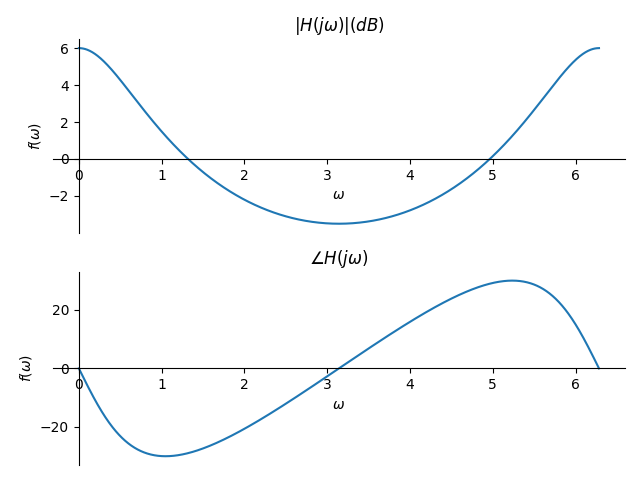

In [13]:
omega = sym.symbols('\omega')
H = sym.exp(sym.I*omega)/(sym.exp(sym.I*omega) - 0.5)
Hganho = sym.Abs(H)
Hfase = sym.arg(H)
p1 = sym.plot(20*sym.log(Hganho,10), (omega, 0, 2*np.pi),show=False, title='$|H(j\omega)| (dB)$')
p2 = sym.plot(Hfase*180/np.pi, (omega, 0,2*np.pi),show=False, title=r'$\angle H(j\omega)$')
PlotGrid(2,1,p1,p2);

Qual a saída deste sistema para a entrada $x[n] = \cos(n)$?

## Referências

- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Lathi, BP, Sinais e Sistemas Lineares, 2007

## Solução dos exercícios